In [6]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

data = pd.read_csv('eci_data_2024.csv', encoding='latin1')  # or 'ISO-8859-1'
data

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
4,5,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
...,...,...,...,...,...,...,...,...,...
8897,9,SK. SAPIYAR ALI,Independent,2924,-,2924,0.21,West Bengal,Uluberia - 26
8898,10,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107,0.15,West Bengal,Uluberia - 26
8899,11,AMAL KUMAR BARMAN,Independent,1997,3,2000,0.14,West Bengal,Uluberia - 26
8900,12,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572,0.11,West Bengal,Uluberia - 26


In [8]:
data = data.drop_duplicates()

In [9]:
data = data.dropna()

In [10]:
numeric_cols = ["EVM Votes", "Postal Votes", "Total Votes"]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce', downcast='integer')


In [11]:
cols = ["Party", "Candidate", "State", "Constituency"]
data[cols] = data[cols].apply(lambda x: x.str.strip().str.title())


In [12]:
top_candidate = data.loc[data["Total Votes"].idxmax()]


In [13]:
print(data.isnull().sum())

S.N               0
Candidate         0
Party             0
EVM Votes         1
Postal Votes    578
Total Votes       1
% of Votes        0
State             0
Constituency      0
dtype: int64


In [14]:
data = data.dropna(subset=["Total Votes", "Constituency"]) 

In [15]:
top_candidates = data.loc[data.groupby("Constituency")["Total Votes"].idxmax()]

In [16]:
top_candidates

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
6800,1,Godam Nagesh,Bharatiya Janata Party,558936.0,9232.0,568168.0,45.98,Telangana,Adilabad - 1
7362,1,Prof S P Singh Baghel,Bharatiya Janata Party,597061.0,2336.0,599397.0,53.34,Uttar Pradesh,Agra - 18
1485,1,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,763028.0,7431.0,770459.0,68.28,Gujarat,Ahmedabad East - 7
1504,1,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,606545.0,5159.0,611704.0,63.28,Gujarat,Ahmedabad West - 8
3536,1,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,622144.0,2653.0,624797.0,47.14,Maharashtra,Ahmednagar - 37
...,...,...,...,...,...,...,...,...,...
4662,1,Amar Sharadrao Kale,Nationalist Congress Party  Sharadchandra Pawar,530761.0,2345.0,533106.0,48.68,Maharashtra,Wardha - 8
3119,1,Rahul Gandhi,Indian National Congress,642299.0,5146.0,647445.0,59.69,Kerala,Wayanad - 4
4884,1,Kamaljeet Sehrawat,Bharatiya Janata Party,838332.0,4326.0,842658.0,55.27,Nct Of Delhi,West Delhi - 6
4687,1,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),591899.0,2908.0,594807.0,48.53,Maharashtra,Yavatmal- Washim - 14


In [17]:
top_candidates.head(10)

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
6800,1,Godam Nagesh,Bharatiya Janata Party,558936.0,9232.0,568168.0,45.98,Telangana,Adilabad - 1
7362,1,Prof S P Singh Baghel,Bharatiya Janata Party,597061.0,2336.0,599397.0,53.34,Uttar Pradesh,Agra - 18
1485,1,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,763028.0,7431.0,770459.0,68.28,Gujarat,Ahmedabad East - 7
1504,1,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,606545.0,5159.0,611704.0,63.28,Gujarat,Ahmedabad West - 8
3536,1,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,622144.0,2653.0,624797.0,47.14,Maharashtra,Ahmednagar - 37
5505,1,Bhagirath Choudhary,Bharatiya Janata Party,741151.0,6311.0,747462.0,62.23,Rajasthan,Ajmer - 13
7374,1,Devendra Singh Alias Bhole Singh,Bharatiya Janata Party,514256.0,3167.0,517423.0,47.6,Uttar Pradesh,Akbarpur - 44
3562,1,Anup Sanjay Dhotre,Bharatiya Janata Party,454972.0,2058.0,457030.0,38.96,Maharashtra,Akola - 6
2915,1,K. C Venugopal,Indian National Congress,398246.0,6314.0,404560.0,38.21,Kerala,Alappuzha - 15
2927,1,K.Radhakrishnan,Communist Party Of India (Marxist),398818.0,4629.0,403447.0,40.66,Kerala,Alathur - 9


In [18]:
top_candidates.to_csv("Top_candidates", index=False)

In [19]:
print("Data cleaning completed successfully!")

Data cleaning completed successfully!


In [20]:
print("Data cleaning completed successfully!")


Data cleaning completed successfully!


In [21]:
top_candidates

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
6800,1,Godam Nagesh,Bharatiya Janata Party,558936.0,9232.0,568168.0,45.98,Telangana,Adilabad - 1
7362,1,Prof S P Singh Baghel,Bharatiya Janata Party,597061.0,2336.0,599397.0,53.34,Uttar Pradesh,Agra - 18
1485,1,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,763028.0,7431.0,770459.0,68.28,Gujarat,Ahmedabad East - 7
1504,1,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,606545.0,5159.0,611704.0,63.28,Gujarat,Ahmedabad West - 8
3536,1,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,622144.0,2653.0,624797.0,47.14,Maharashtra,Ahmednagar - 37
...,...,...,...,...,...,...,...,...,...
4662,1,Amar Sharadrao Kale,Nationalist Congress Party  Sharadchandra Pawar,530761.0,2345.0,533106.0,48.68,Maharashtra,Wardha - 8
3119,1,Rahul Gandhi,Indian National Congress,642299.0,5146.0,647445.0,59.69,Kerala,Wayanad - 4
4884,1,Kamaljeet Sehrawat,Bharatiya Janata Party,838332.0,4326.0,842658.0,55.27,Nct Of Delhi,West Delhi - 6
4687,1,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),591899.0,2908.0,594807.0,48.53,Maharashtra,Yavatmal- Washim - 14


In [22]:
filtered_table = top_candidates[["Candidate", "Party", "State", "Constituency","Total Votes"]]
print(filtered_table)

                          Candidate  \
6800                   Godam Nagesh   
7362          Prof S P Singh Baghel   
1485  Hasmukhbhai Patel (H.S.Patel)   
1504  Dineshbhai Makwana (Advocate)   
3536          Nilesh Dnyandev Lanke   
...                             ...   
4662            Amar Sharadrao Kale   
3119                   Rahul Gandhi   
4884             Kamaljeet Sehrawat   
4687       Sanjay Uttamrao Deshmukh   
7322           Suresh Kumar Shetkar   

                                                 Party          State  \
6800                            Bharatiya Janata Party      Telangana   
7362                            Bharatiya Janata Party  Uttar Pradesh   
1485                            Bharatiya Janata Party        Gujarat   
1504                            Bharatiya Janata Party        Gujarat   
3536  Nationalist Congress Party  Sharadchandra Pawar    Maharashtra   
...                                                ...            ...   
4662  Nationalist Co

In [23]:
filtered_table

,Candidate,Party,State,Constituency,Total Votes
6800,Godam Nagesh,Bharatiya Janata Party,Telangana,Adilabad - 1,568168.0
7362,Prof S P Singh Baghel,Bharatiya Janata Party,Uttar Pradesh,Agra - 18,599397.0
1485,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,Gujarat,Ahmedabad East - 7,770459.0
1504,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,Gujarat,Ahmedabad West - 8,611704.0
3536,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Ahmednagar - 37,624797.0
...,...,...,...,...,...
4662,Amar Sharadrao Kale,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Wardha - 8,533106.0
3119,Rahul Gandhi,Indian National Congress,Kerala,Wayanad - 4,647445.0
4884,Kamaljeet Sehrawat,Bharatiya Janata Party,Nct Of Delhi,West Delhi - 6,842658.0
4687,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),Maharashtra,Yavatmal- Washim - 14,594807.0


In [24]:
print(filtered_table)

                          Candidate  \
6800                   Godam Nagesh   
7362          Prof S P Singh Baghel   
1485  Hasmukhbhai Patel (H.S.Patel)   
1504  Dineshbhai Makwana (Advocate)   
3536          Nilesh Dnyandev Lanke   
...                             ...   
4662            Amar Sharadrao Kale   
3119                   Rahul Gandhi   
4884             Kamaljeet Sehrawat   
4687       Sanjay Uttamrao Deshmukh   
7322           Suresh Kumar Shetkar   

                                                 Party          State  \
6800                            Bharatiya Janata Party      Telangana   
7362                            Bharatiya Janata Party  Uttar Pradesh   
1485                            Bharatiya Janata Party        Gujarat   
1504                            Bharatiya Janata Party        Gujarat   
3536  Nationalist Congress Party  Sharadchandra Pawar    Maharashtra   
...                                                ...            ...   
4662  Nationalist Co

In [25]:
filtered_table.to_csv("filtered_table.csv", index=False)


In [26]:
data

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
0,1,Bishnu Pada Ray,Bharatiya Janata Party,102182.0,254.0,102436.0,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
1,2,Kuldeep Rai Sharma,Indian National Congress,77829.0,211.0,78040.0,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
2,3,Manoj Paul,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
3,4,D Ayyappan,Communist Party Of India (Marxist),6009.0,8.0,6017.0,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
4,5,V.K. Abdul Aziz,Independent,2195.0,8.0,2203.0,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
...,...,...,...,...,...,...,...,...,...
8897,9,Sk. Sapiyar Ali,Independent,2924.0,NaN,2924.0,0.21,West Bengal,Uluberia - 26
8898,10,Nikhil Bera,Socialist Unity Centre Of India (Communist),2095.0,12.0,2107.0,0.15,West Bengal,Uluberia - 26
8899,11,Amal Kumar Barman,Independent,1997.0,3.0,2000.0,0.14,West Bengal,Uluberia - 26
8900,12,Ramprasad Ghorai,Indian Unity Centre,1568.0,4.0,1572.0,0.11,West Bengal,Uluberia - 26


In [27]:
second_highest_candidates = (
    data.sort_values(["Constituency", "Total Votes"], ascending=[True, False])
    .groupby("Constituency")
    .nth(1)
)

In [28]:
second_highest_candidates

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
6801,2,Athram Suguna,Indian National Congress,472333.0,5183.0,477516.0,38.65,Telangana,Adilabad - 1
7363,2,Suresh Chand Kardam,Samajwadi Party,326644.0,1459.0,328103.0,29.2,Uttar Pradesh,Agra - 18
1486,2,Himmatsinh Prahladsinh Patel,Indian National Congress,303713.0,4991.0,308704.0,27.36,Gujarat,Ahmedabad East - 7
1505,2,Bharat Yogendra Makwana,Indian National Congress,321972.0,3295.0,325267.0,33.65,Gujarat,Ahmedabad West - 8
3537,2,Dr. Sujay Radhakrishna Vikhepatil,Bharatiya Janata Party,593568.0,2300.0,595868.0,44.95,Maharashtra,Ahmednagar - 37
...,...,...,...,...,...,...,...,...,...
4663,2,Ramdas Chandrabhan Tadas,Bharatiya Janata Party,449599.0,1859.0,451458.0,41.23,Maharashtra,Wardha - 8
3120,2,Annie Raja,Communist Party Of India,280594.0,2429.0,283023.0,26.09,Kerala,Wayanad - 4
4885,2,Mahabal Mishra,Aam Aadmi Party,641759.0,1886.0,643645.0,42.22,Nct Of Delhi,West Delhi - 6
4688,2,Rajshritai Hemant Patil (Mahalle),Shiv Sena,498514.0,1820.0,500334.0,40.83,Maharashtra,Yavatmal- Washim - 14


In [29]:
second =second_highest_candidates[["Candidate", "Party", "State", "Constituency","Total Votes"]]
filtered_table

,Candidate,Party,State,Constituency,Total Votes
6800,Godam Nagesh,Bharatiya Janata Party,Telangana,Adilabad - 1,568168.0
7362,Prof S P Singh Baghel,Bharatiya Janata Party,Uttar Pradesh,Agra - 18,599397.0
1485,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,Gujarat,Ahmedabad East - 7,770459.0
1504,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,Gujarat,Ahmedabad West - 8,611704.0
3536,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Ahmednagar - 37,624797.0
...,...,...,...,...,...
4662,Amar Sharadrao Kale,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Wardha - 8,533106.0
3119,Rahul Gandhi,Indian National Congress,Kerala,Wayanad - 4,647445.0
4884,Kamaljeet Sehrawat,Bharatiya Janata Party,Nct Of Delhi,West Delhi - 6,842658.0
4687,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),Maharashtra,Yavatmal- Washim - 14,594807.0


In [30]:
second.to_csv("second_higest.csv",index=False)

In [31]:
merged_table = filtered_table.merge(second[["State", "Constituency", "Candidate", "Party","Total Votes"]],
                                 on=["State", "Constituency"],
                                 how="left",
                                 suffixes=("_First", "_Second"))

merged_table

,Candidate_First,Party_First,State,Constituency,Total Votes_First,Candidate_Second,Party_Second,Total Votes_Second
0,Godam Nagesh,Bharatiya Janata Party,Telangana,Adilabad - 1,568168.0,Athram Suguna,Indian National Congress,477516.0
1,Prof S P Singh Baghel,Bharatiya Janata Party,Uttar Pradesh,Agra - 18,599397.0,Suresh Chand Kardam,Samajwadi Party,328103.0
2,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,Gujarat,Ahmedabad East - 7,770459.0,Himmatsinh Prahladsinh Patel,Indian National Congress,308704.0
3,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,Gujarat,Ahmedabad West - 8,611704.0,Bharat Yogendra Makwana,Indian National Congress,325267.0
4,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Ahmednagar - 37,624797.0,Dr. Sujay Radhakrishna Vikhepatil,Bharatiya Janata Party,595868.0
...,...,...,...,...,...,...,...,...
537,Amar Sharadrao Kale,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Wardha - 8,533106.0,Ramdas Chandrabhan Tadas,Bharatiya Janata Party,451458.0
538,Rahul Gandhi,Indian National Congress,Kerala,Wayanad - 4,647445.0,Annie Raja,Communist Party Of India,283023.0
539,Kamaljeet Sehrawat,Bharatiya Janata Party,Nct Of Delhi,West Delhi - 6,842658.0,Mahabal Mishra,Aam Aadmi Party,643645.0
540,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),Maharashtra,Yavatmal- Washim - 14,594807.0,Rajshritai Hemant Patil (Mahalle),Shiv Sena,500334.0


In [32]:
merged_table.to_csv('updated_table.csv',index=False)

In [33]:
merged_table 

,Candidate_First,Party_First,State,Constituency,Total Votes_First,Candidate_Second,Party_Second,Total Votes_Second
0,Godam Nagesh,Bharatiya Janata Party,Telangana,Adilabad - 1,568168.0,Athram Suguna,Indian National Congress,477516.0
1,Prof S P Singh Baghel,Bharatiya Janata Party,Uttar Pradesh,Agra - 18,599397.0,Suresh Chand Kardam,Samajwadi Party,328103.0
2,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,Gujarat,Ahmedabad East - 7,770459.0,Himmatsinh Prahladsinh Patel,Indian National Congress,308704.0
3,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,Gujarat,Ahmedabad West - 8,611704.0,Bharat Yogendra Makwana,Indian National Congress,325267.0
4,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Ahmednagar - 37,624797.0,Dr. Sujay Radhakrishna Vikhepatil,Bharatiya Janata Party,595868.0
...,...,...,...,...,...,...,...,...
537,Amar Sharadrao Kale,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Wardha - 8,533106.0,Ramdas Chandrabhan Tadas,Bharatiya Janata Party,451458.0
538,Rahul Gandhi,Indian National Congress,Kerala,Wayanad - 4,647445.0,Annie Raja,Communist Party Of India,283023.0
539,Kamaljeet Sehrawat,Bharatiya Janata Party,Nct Of Delhi,West Delhi - 6,842658.0,Mahabal Mishra,Aam Aadmi Party,643645.0
540,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),Maharashtra,Yavatmal- Washim - 14,594807.0,Rajshritai Hemant Patil (Mahalle),Shiv Sena,500334.0


In [34]:
merged_table ["Margin"] = merged_table ["Total Votes_First"] - merged_table ["Total Votes_Second"]
merged_table


,Candidate_First,Party_First,State,Constituency,Total Votes_First,Candidate_Second,Party_Second,Total Votes_Second,Margin
0,Godam Nagesh,Bharatiya Janata Party,Telangana,Adilabad - 1,568168.0,Athram Suguna,Indian National Congress,477516.0,90652.0
1,Prof S P Singh Baghel,Bharatiya Janata Party,Uttar Pradesh,Agra - 18,599397.0,Suresh Chand Kardam,Samajwadi Party,328103.0,271294.0
2,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,Gujarat,Ahmedabad East - 7,770459.0,Himmatsinh Prahladsinh Patel,Indian National Congress,308704.0,461755.0
3,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,Gujarat,Ahmedabad West - 8,611704.0,Bharat Yogendra Makwana,Indian National Congress,325267.0,286437.0
4,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Ahmednagar - 37,624797.0,Dr. Sujay Radhakrishna Vikhepatil,Bharatiya Janata Party,595868.0,28929.0
...,...,...,...,...,...,...,...,...,...
537,Amar Sharadrao Kale,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Wardha - 8,533106.0,Ramdas Chandrabhan Tadas,Bharatiya Janata Party,451458.0,81648.0
538,Rahul Gandhi,Indian National Congress,Kerala,Wayanad - 4,647445.0,Annie Raja,Communist Party Of India,283023.0,364422.0
539,Kamaljeet Sehrawat,Bharatiya Janata Party,Nct Of Delhi,West Delhi - 6,842658.0,Mahabal Mishra,Aam Aadmi Party,643645.0,199013.0
540,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),Maharashtra,Yavatmal- Washim - 14,594807.0,Rajshritai Hemant Patil (Mahalle),Shiv Sena,500334.0,94473.0


In [35]:
 merged_table= merged_table.drop(columns=["Total Votes_First", "Total Votes_Second"])


In [36]:
merged_table

,Candidate_First,Party_First,State,Constituency,Candidate_Second,Party_Second,Margin
0,Godam Nagesh,Bharatiya Janata Party,Telangana,Adilabad - 1,Athram Suguna,Indian National Congress,90652.0
1,Prof S P Singh Baghel,Bharatiya Janata Party,Uttar Pradesh,Agra - 18,Suresh Chand Kardam,Samajwadi Party,271294.0
2,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,Gujarat,Ahmedabad East - 7,Himmatsinh Prahladsinh Patel,Indian National Congress,461755.0
3,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,Gujarat,Ahmedabad West - 8,Bharat Yogendra Makwana,Indian National Congress,286437.0
4,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Ahmednagar - 37,Dr. Sujay Radhakrishna Vikhepatil,Bharatiya Janata Party,28929.0
...,...,...,...,...,...,...,...
537,Amar Sharadrao Kale,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,Wardha - 8,Ramdas Chandrabhan Tadas,Bharatiya Janata Party,81648.0
538,Rahul Gandhi,Indian National Congress,Kerala,Wayanad - 4,Annie Raja,Communist Party Of India,364422.0
539,Kamaljeet Sehrawat,Bharatiya Janata Party,Nct Of Delhi,West Delhi - 6,Mahabal Mishra,Aam Aadmi Party,199013.0
540,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),Maharashtra,Yavatmal- Washim - 14,Rajshritai Hemant Patil (Mahalle),Shiv Sena,94473.0


In [37]:
merged_table = merged_table[["Constituency", "State", "Candidate_First", "Party_First", 
         "Candidate_Second", "Party_Second", "Margin",]]

In [38]:
merged_table

,Constituency,State,Candidate_First,Party_First,Candidate_Second,Party_Second,Margin
0,Adilabad - 1,Telangana,Godam Nagesh,Bharatiya Janata Party,Athram Suguna,Indian National Congress,90652.0
1,Agra - 18,Uttar Pradesh,Prof S P Singh Baghel,Bharatiya Janata Party,Suresh Chand Kardam,Samajwadi Party,271294.0
2,Ahmedabad East - 7,Gujarat,Hasmukhbhai Patel (H.S.Patel),Bharatiya Janata Party,Himmatsinh Prahladsinh Patel,Indian National Congress,461755.0
3,Ahmedabad West - 8,Gujarat,Dineshbhai Makwana (Advocate),Bharatiya Janata Party,Bharat Yogendra Makwana,Indian National Congress,286437.0
4,Ahmednagar - 37,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party  Sharadchandra Pawar,Dr. Sujay Radhakrishna Vikhepatil,Bharatiya Janata Party,28929.0
...,...,...,...,...,...,...,...
537,Wardha - 8,Maharashtra,Amar Sharadrao Kale,Nationalist Congress Party  Sharadchandra Pawar,Ramdas Chandrabhan Tadas,Bharatiya Janata Party,81648.0
538,Wayanad - 4,Kerala,Rahul Gandhi,Indian National Congress,Annie Raja,Communist Party Of India,364422.0
539,West Delhi - 6,Nct Of Delhi,Kamaljeet Sehrawat,Bharatiya Janata Party,Mahabal Mishra,Aam Aadmi Party,199013.0
540,Yavatmal- Washim - 14,Maharashtra,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),Rajshritai Hemant Patil (Mahalle),Shiv Sena,94473.0


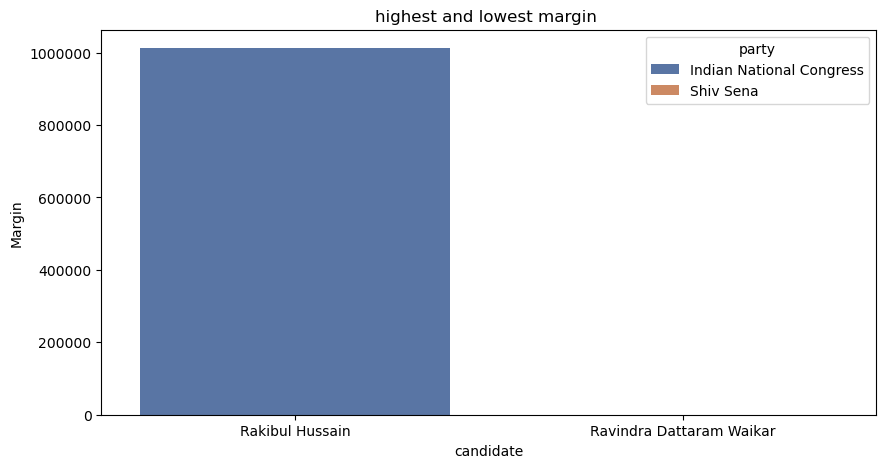

In [43]:
highest_margin=merged_table.loc[merged_table['Margin'].idxmax()]
lowest_margin=merged_table.loc[merged_table['Margin'].idxmin()]

high_low=pd.DataFrame({'candidate':[highest_margin['Candidate_First'],lowest_margin['Candidate_First']],'party':[highest_margin['Party_First'],lowest_margin['Party_First']],'Margin':[highest_margin['Margin'],lowest_margin['Margin']]})
#plot
plt.figure(figsize=(10,5))
sns.barplot(x=high_low['candidate'],y=high_low['Margin'],palette='deep',hue=high_low['party'])
plt.ticklabel_format(style='plain',axis='y')
plt.title("highest and lowest margin ")
plt.xlabel('candidate')
plt.ylabel('Margin')
plt.show()


D:\SYSTEM FILE\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SYSTEM FILE\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


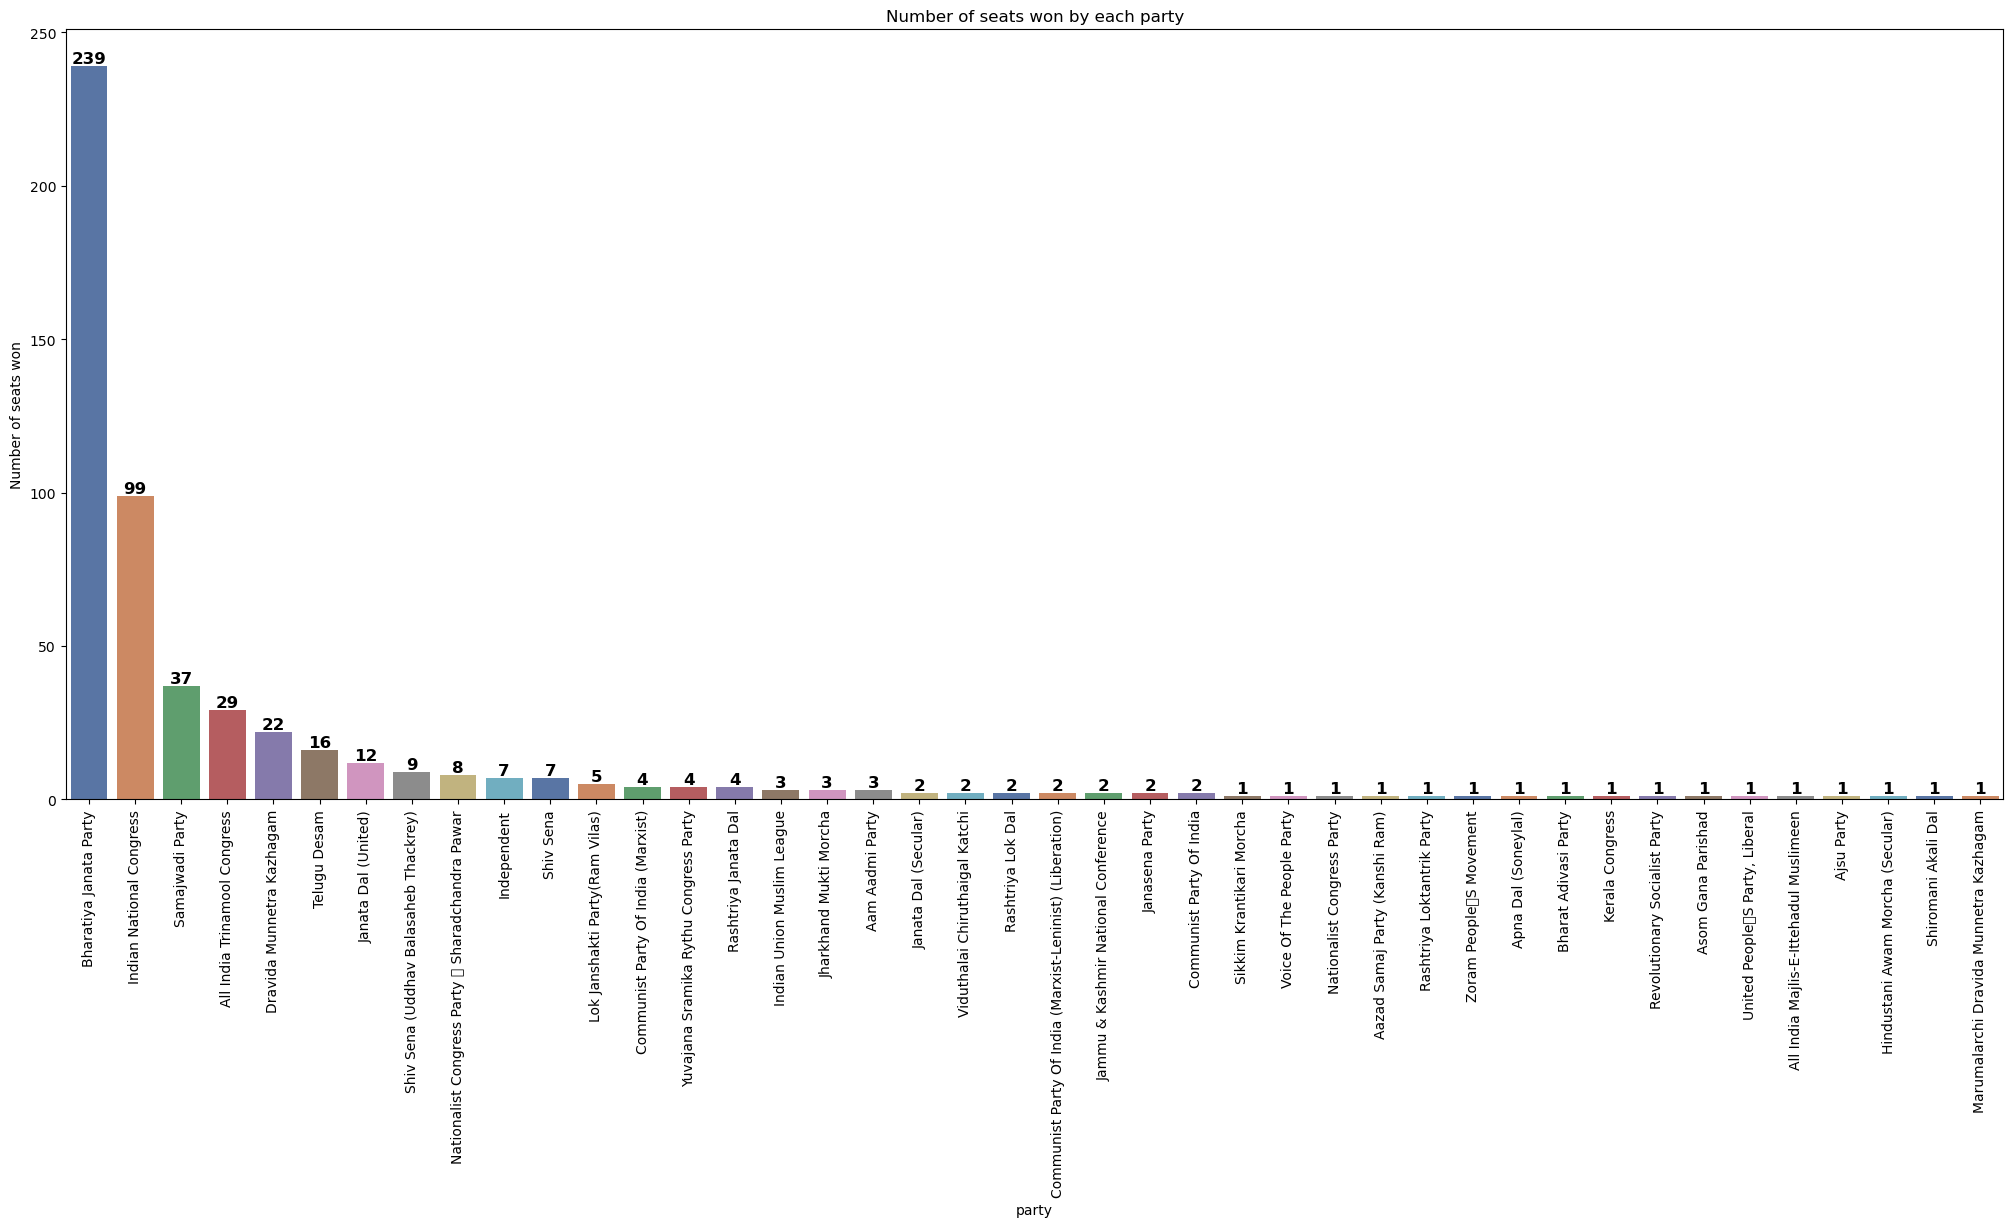

In [57]:
merged_table['Margin']=pd.to_numeric(merged_table['Margin'],errors='coerce')
seats_won=merged_table['Party_First'].value_counts()
seats_won
plt.figure(figsize=(25,10))
ax=sns.barplot(x=seats_won.index,y=seats_won.values,hue=seats_won.index,palette="deep",legend=False)
# Add seat count on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position (center of the bar)
            p.get_height(),                 # Y position (top of the bar)
            int(p.get_height()),            # Display the seat count
            ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.title('Number of seats won by each party')
plt.xlabel('party')
plt.ylabel('Number of seats won')
plt.xticks(rotation=90)
plt.show()


In [80]:
candidate=['Rahul Gandhi','Narendra Modi','Amit Shah']
#check candidate column containes those names ,if contains select the row 
names=top_candidates.loc[top_candidates['Candidate'].isin(candidate)]
print(names)

      S.N      Candidate                     Party  EVM Votes  Postal Votes  \
1590    1      Amit Shah    Bharatiya Janata Party   999984.0       10988.0   
8158    1   Rahul Gandhi  Indian National Congress   686044.0        1605.0   
8285    1  Narendra Modi    Bharatiya Janata Party   611439.0        1531.0   
3119    1   Rahul Gandhi  Indian National Congress   642299.0        5146.0   

      Total Votes % of Votes          State     Constituency  
1590    1010972.0      76.48        Gujarat  Gandhinagar - 6  
8158     687649.0      66.17  Uttar Pradesh  Rae Bareli - 36  
8285     612970.0      54.24  Uttar Pradesh    Varanasi - 77  
3119     647445.0      59.69         Kerala      Wayanad - 4  


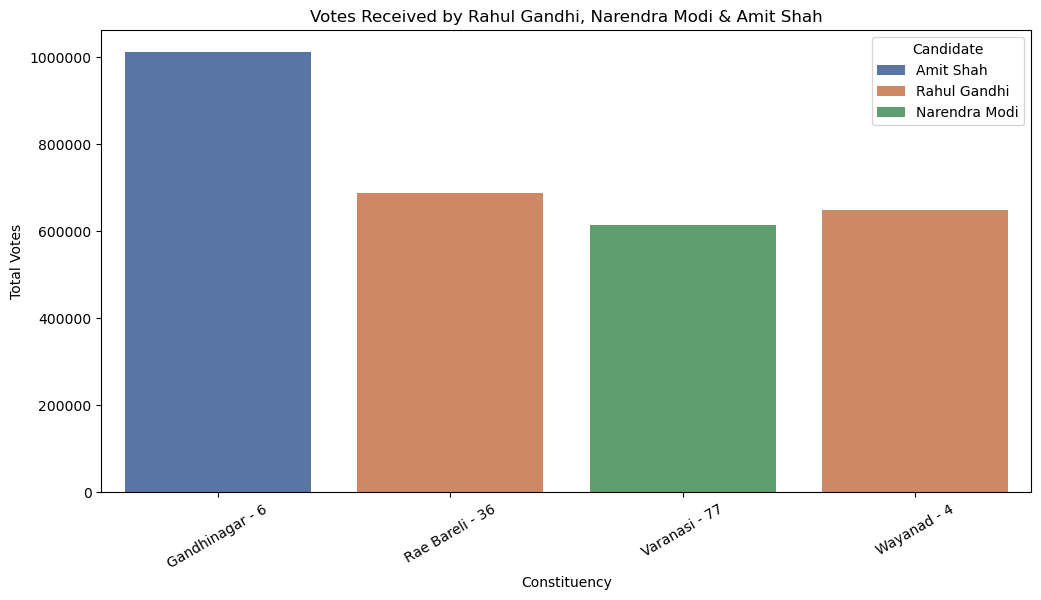

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x=names['Constituency'],y=names['Total Votes'], hue=names["Candidate"], palette="deep")
plt.xlabel("Constituency")
plt.ylabel("Total Votes")
plt.title("Votes Received by Rahul Gandhi, Narendra Modi & Amit Shah")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=30) 


plt.show()

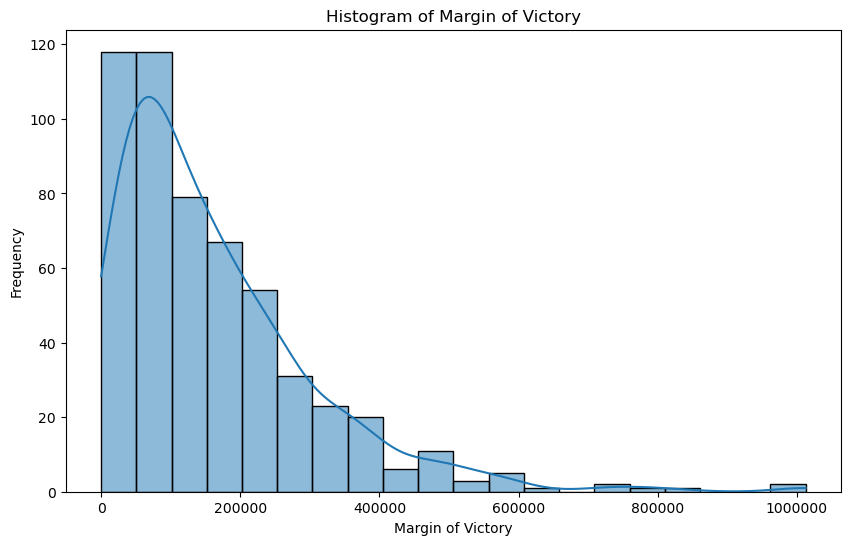

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_table['Margin'], bins=20,kde=True)
plt.ticklabel_format(style='plain',axis='x')
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

D:\SYSTEM FILE\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SYSTEM FILE\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


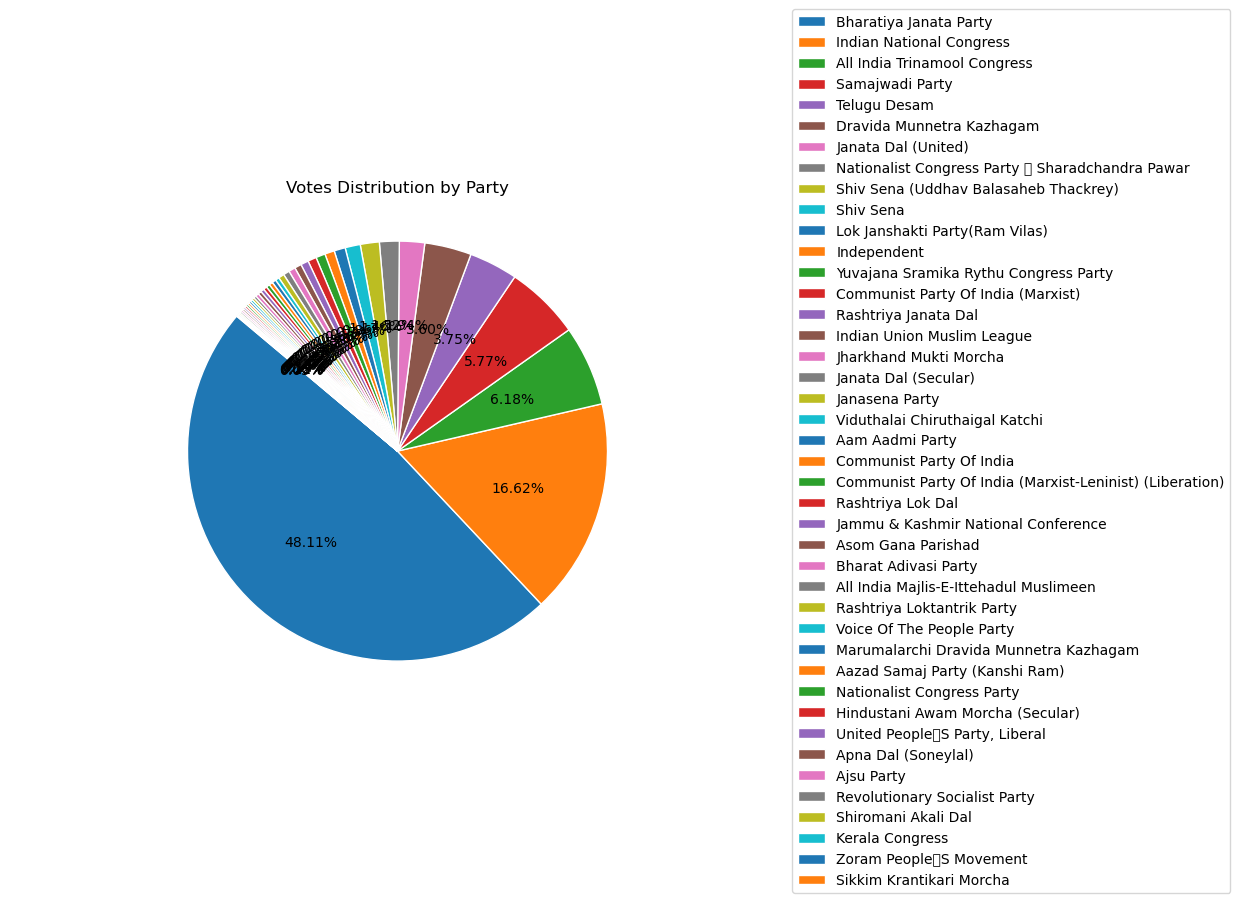

In [97]:
vote_distribution=top_candidates.groupby('Party')['Total Votes'].sum().sort_values(ascending=False)
#plot pie chart
plt.figure(figsize=(10,6))
wedges,texts,autotexts=plt.pie(vote_distribution,labels=None,autopct='%1.2f%%',startangle=140,wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal') 
plt.legend(
   labels=vote_distribution.index,bbox_to_anchor=(1, 0.5),loc='center left'
)
plt.show()

D:\SYSTEM FILE\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


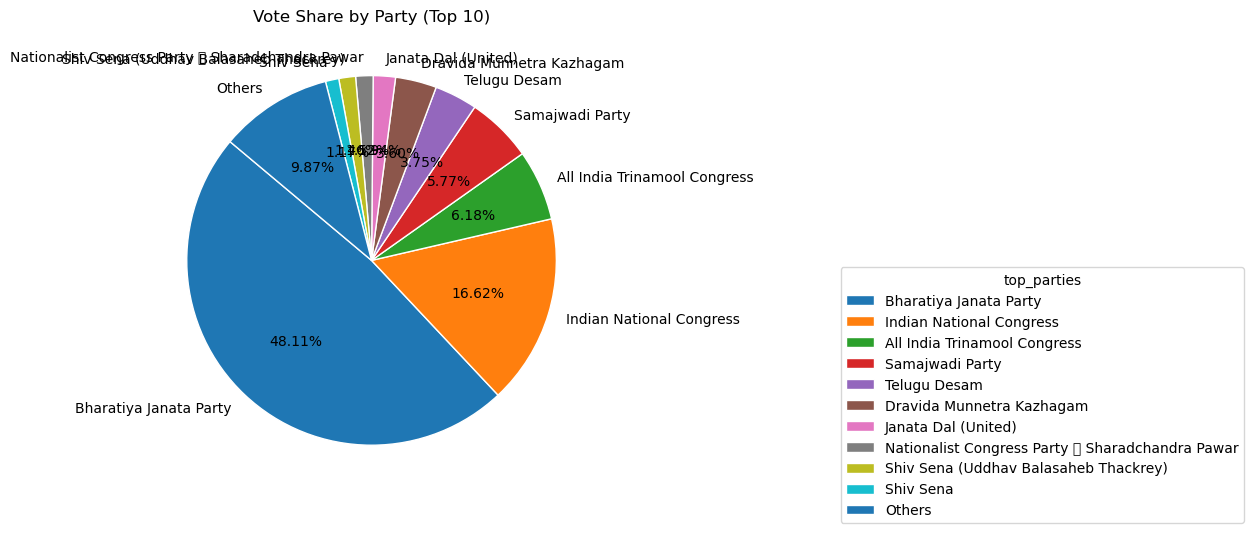

In [100]:
top_parties = vote_distribution.nlargest(10)
others_sum = vote_distribution.sum() - top_parties.sum()
top_parties["Others"] = others_sum

# Plot pie chart
plt.figure(figsize=(10,6))
plt.pie(top_parties, labels=top_parties.index, autopct='%1.2f%%',wedgeprops=dict(edgecolor='w'), startangle=140)           
plt.title("Vote Share by Party (Top 10)")
plt.legend(title='top_parties',bbox_to_anchor=(1.5, 0.5) )
plt.show()


In [105]:
merged_table.to_csv("election result.csv", index=False)